<h1><center>Laboratorio 5: El Pandas no Muerde (act IV) 🐼</center></h1>

<center><strong>MDS7202: Laboratorio de Programación Científica para Ciencia de Datos</strong></center>

### Cuerpo Docente:

- Profesor: Matias Rojas y Mauricio Araneda
- Auxiliar: Ignacio Meza D.
- Ayudante: Rodrigo Ortiz

### Equipo: SUPER IMPORTANTE - notebooks sin nombre no serán revisados

- Nombre de alumno 1: Johnny Godoy

### **Link de repositorio de GitHub:** `https://github.com/johnny-godoy/laboratorios-mds/blob/main/lab%205/laboratorio_5.ipynb`


## Reglas:

- **Grupos de 2 personas**
- **Ausentes** deberán realizar la actividad solos. 
- Cualquier duda fuera del horario de clases al foro. Mensajes al equipo docente serán respondidos por este medio.
- Prohibidas las copias. 
- Pueden usar cualquer matrial del curso que estimen conveniente.

### Objetivos principales del laboratorio

- Aplicar los paradigmas y buenas prácticas de programación vistas hasta este momento.
- Comprender y aprovechar las ventajas que nos ofrece la liberia `numpy` con respecto a trabajar en Python 'puro'.
- Visualizar aplicaciones de filtros de imágenes sin el uso de librerías.
- Verificar que el uso indiscriminado de `for` puede afectar en la eficiencia en al procesar datos masivos.


El laboratorio deberá ser desarrollado sin el uso indiscriminado de iteradores nativos de python (aka "for", "while"). La idea es que aprendan a exprimir al máximo las funciones optimizadas que nos entrega `numpy`, las cuales vale mencionar, son bastante más eficientes que los iteradores nativos sobre arreglos (*o tensores*).

## Descripción del laboratorio.

### Importamos librerias utiles 😸

In [1]:
import datetime

from IPython.display import display, Markdown, Latex
from pandas.api.types import is_numeric_dtype
from pandas.core.dtypes.common import is_datetime_or_timedelta_dtype

import matplotlib.pyplot as plt
import missingno as msno
import numpy as np
import pandas as pd
import plotly.express as px
from scipy import stats

<p align="center"><iframe width="560" height="315" src="https://www.youtube.com/embed/MW4d8_LLYp8?rel=0&amp;controls=0&amp;showinfo=0" frameborder="1" allowfullscreen></iframe></p>

# Segmentación de Clientes en Tienda de Retail 🛍️

<p align="center">
  <img width=300 src="https://s1.eestatic.com/2018/04/14/social/la_jungla_-_social_299733421_73842361_854x640.jpg">
</p>

## 1.1 Cargar Dataset

Mr. Lepin Mora quien es el gerente de una cotizada tienda de retail en Europa, les solicita si pueden analizar los datos de algunas de sus tiendas y si es posible extraer los diferenciar los tipos de clientes que posee el retail.

Para esto, el área de ventas les entrega el archivo `online_retail_II.xlsx` con el que se les pide que cargue y visualicen algunas de las filas que componen el Dataset.

Realice una primera visualización de los datos y señale los atributos que componen el dataset. Señale las columnas que conforman el dataset, el tipo de variable presente en cada columna y comente que representa cada una de estas.

**Respuesta:**

In [2]:
df_retail = pd.read_pickle("data/online_retail_II.pickle")
df_retail = df_retail.astype(
    {
        "Invoice": "category",
        "StockCode": "category",
        "Description": str,
        "Customer ID": "category",
    }
)
df_retail.head()


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


¿Cuáles son los tipos de datos?

In [22]:
df_retail.dtypes

Invoice              category
StockCode            category
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
Price                 float64
Customer ID          category
Country                object
dtype: object

¿Qué rango tienen los datos?

In [16]:
for nombre, columna in df_retail.select_dtypes(["category", "object"]).items():
    print(f"Cantidad de valores únicos de {nombre}: {columna.nunique()}")

for nombre, columna in df_retail.select_dtypes(["int64", "datetime64[ns]", "float64"]).items():
    print(f"Rando de valores para {nombre}: {[columna.min(), columna.max()]}")

Cantidad de valores únicos de Invoice: 28816
Cantidad de valores únicos de StockCode: 4632
Cantidad de valores únicos de Description: 4682
Cantidad de valores únicos de Customer ID: 4383
Cantidad de valores únicos de Country: 40
Rando de valores para Quantity: [-9600, 19152]
Rando de valores para InvoiceDate: [Timestamp('2009-12-01 07:45:00'), Timestamp('2010-12-09 20:01:00')]
Rando de valores para Price: [-53594.36, 25111.09]


In [76]:
df_retail.sort_values(["Price"])

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
179403,A506401,B,Adjust bad debt,1,2010-04-29 13:36:00,-53594.36,NaN,United Kingdom
276274,A516228,B,Adjust bad debt,1,2010-07-19 11:24:00,-44031.79,NaN,United Kingdom
403472,A528059,B,Adjust bad debt,1,2010-10-20 12:04:00,-38925.87,NaN,United Kingdom
264267,514947,84509F,nan,-23,2010-07-07 11:45:00,0.00,NaN,United Kingdom
221076,510876,90025B,nan,-42,2010-06-04 09:58:00,0.00,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
519294,C537651,AMAZONFEE,AMAZON FEE,-1,2010-12-07 15:49:00,13541.33,NaN,United Kingdom
517955,537632,AMAZONFEE,AMAZON FEE,1,2010-12-07 15:08:00,13541.33,NaN,United Kingdom
320581,C520667,BANK CHARGES,Bank Charges,-1,2010-08-27 13:42:00,18910.69,NaN,United Kingdom
241827,512771,M,Manual,1,2010-06-17 16:53:00,25111.09,NaN,United Kingdom


Parece ser que cada fila está identificada por un par (compra, producto).
Para verificar esto, debemos eliminar las filas repetidas.

In [78]:
no_duplicates = df_retail.drop_duplicates().dropna()
no_duplicates = no_duplicates[(no_duplicates.Quantity > 0) & (no_duplicates.Price > 0)]
no_duplicates[["Invoice", "StockCode", "Price"]].duplicated().sum()

5877

In [70]:
no_duplicates = df_retail.drop_duplicates()
no_duplicates[["Invoice", "StockCode", "Price"]].duplicated().sum()

6008

| Atributo    | Tipo de Datos  | Rango                   | Explicación                     |
|-------------|----------------|-------------------------|---------------------------------|
| Invoice     | category       | 28816 valores           | Identificador de la transacción |
| StockCode   | category       | 4632 códigos            | Código del producto             |
| Description | object         | 4682 descripciones      | Descripción del producto        |
| Quantity    | int64          | [-9600, 19152]          | Cantidad transaccionada         |
| InvoiceDate | datetime64[ns] | 01/12/2009 - 09/12/2010 | Fecha de la transacción         |
| Price       | float64        | [-53594.36, 25111.09]   | Precio del producto             |
| Customer ID | category       | 4383 códigos            | Identificador del cliente       |
| Country     | object         | 40 países               | País de la transacción          |

In [21]:
df_retail.Invoice.unique()

[489434, 489435, 489436, 489437, 489438, ..., 538167, 538168, 538169, 538170, 538171]
Length: 28816
Categories (28816, object): [489434, 489435, 489436, 489437, ..., 'C538122', 'C538123', 'C538124', 'C538164']

## 1.2 Analisís Explotatorio de los Datos [0.5 puntos] 

En base a la primera visualización del dataset, *Don Mora* le solicita que realicen un análisis exploratorio de los datos, para esto les deberán realizar un análisis univariado y multivariado. De la revisión, ustedes deben explicar potenciales anomalías visualizadas y señalar si existe la necesidad de realizar una limpieza de datos.

Explique a que nos referimos con análisis univariable, multivariable y de datos faltantes. ¿Qué beneficios nos otorga estudiar estos datos?. Sea conciso con su respuesta y no escriba mas de 5 líneas para su respuesta.

**Respuesta a la Pregunta:**

El análisis univariado estudia la distribución marginal de cada una de las columnas por separado. En el análisis multivariado, uno estudia las relaciones entre múltiples variables. Analizar datos faltantes busca ver si hay columnas incompletas (valores NaN u otros) o filas faltantes (eg: en caso de datos secuenciales, ver si falta un paso).

### 1.2.1 Análisis Univariado [2 Puntos]

A continuación, se le presentan dos funciones para analizar los datos que componen un dataframe. La primera de estas es la función ``profile_serie()`` la cual recibe una serie y le entrega un análisis detallado de los datos que conforman dicha serie. 

Ejecute la funcion ``profile_serie()`` sobre cada serie para realizar un análisis univariado de estas. A continuación, comente acerca de el comportamiento de cada variable según las estadísticas descriptivas y los gráficos generados.

In [4]:
def profile_serie(serie_in, n_samples=1000, random_state=42):
    serie = serie_in.copy()

    profile = pd.Series(dtype='object')
    profile["Type"] = serie.dtype
    profile = pd.concat([profile, serie.describe(datetime_is_numeric=True)])

    # profile = pd.Series([])

    if is_numeric_dtype(serie):
        profile["Negative"] = (serie < 0).sum()
        profile["Negative (%)"] = (
            str(round((serie < 0).sum() / len(serie) * 100, 2)) + " %"
        )
        profile["Zeros"] = (serie == 0).sum()
        profile["Zeros (%)"] = (
            str(round((serie == 0).sum() / len(serie) * 100, 2)) + " %"
        )
        profile["Kurt"] = serie.kurt()
        profile["Skew"] = serie.skew()

    profile[" "] = " "  # espacio

    profile["Missing cells"] = serie.isnull().sum()
    profile["Missing cells (%)"] = (
        str(round(serie.isnull().sum() / len(serie) * 100, 2)) + " %"
    )
    profile["Duplicate rows"] = serie.duplicated(False).sum()
    profile["Duplicate rows (%)"] = (
        str(round(serie.duplicated(False).sum() / len(serie) * 100, 2)) + " %"
    )
    profile["Total size in memory"] = str(serie.memory_usage(index=True)) + " bytes"

    # profile = pd.concat([profile, description])

    profile = profile.rename(
        index={
            "count": "Number of observations",
            "mean": "Mean",
            "std": "Std",
            "min": "Min",
            "max": "Max",
            "unique": "Unique",
            "top": "Top",
            "freq": "Freq",
        }
    )
    no_outliers_fig = None

    if is_numeric_dtype(serie):

        sampled_serie = serie.sample(n_samples, random_state=random_state)
        fig = px.histogram(
            sampled_serie, marginal="box", title=f"{serie.name} - With Outliers"
        )

        no_outliers = sampled_serie.loc[(np.abs(stats.zscore(sampled_serie)) < 3)]
        # zscore = https://es.wikipedia.org/wiki/Unidad_tipificada

        no_outliers_fig = px.histogram(
            no_outliers, marginal="box", title=f"{serie.name} - Without Outliers"
        )

    elif is_datetime_or_timedelta_dtype(serie):
        sampled_serie = serie.sample(n_samples, random_state=random_state)
        fig = px.histogram(sampled_serie, marginal="box", title=f"{serie.name}")

    else:
        count = (
            serie.value_counts()[0:100]
            .reset_index()
            .rename(columns={"index": serie.name, serie.name: "Count"})
        )
        fig = px.bar(
            x=count[serie.name].astype(str),
            y=count["Count"],
            title=f"100 Most common categories of {serie.name}",
        )
    display(Markdown(f'## {serie.name} Profile'))
    display(profile)
    fig.show()

    if no_outliers_fig:
        no_outliers_fig.show()

    # return fig, profile

    Análisis de la primera serie...

## Invoice Profile

Type                           category
Number of observations           525461
Unique                            28816
Top                              537434
Freq                                675
                                       
Missing cells                         0
Missing cells (%)                 0.0 %
Duplicate rows                   517456
Duplicate rows (%)              98.48 %
Total size in memory      2338386 bytes
dtype: object

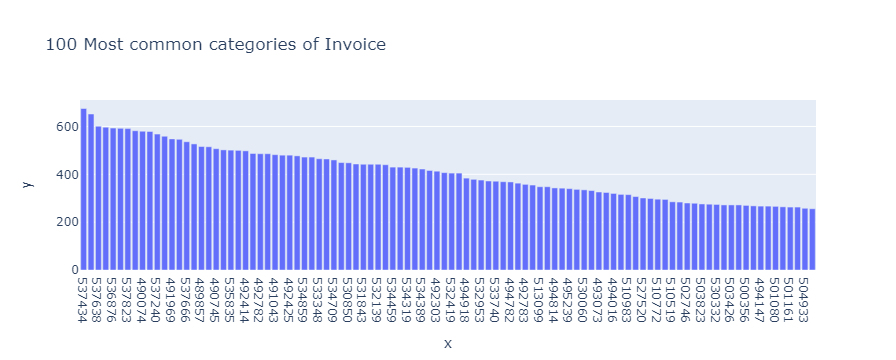

In [6]:
profile_serie(df_retail['Invoice'])

In [7]:
df_retail

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.0,United Kingdom
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.0,United Kingdom


    Análisis de la primera n-esima serie...

### 1.2.2 Análisis Multivariado y Datos Faltantes [1 ptos]

En segundo lugar encontrará la función ``profile_df()`` que recibe un dataframe como entrada y realiza un análisis bivariado de todas las variables numéricas que conforman el dataframe, un analisis de la correlación de Pearson entre las variables numericas del dataframe y la matriz de datos faltantes.

In [ ]:
def profile_df(dataframe_in):
    df = dataframe_in.copy()

    list_type = []
    for col in list(df.columns):
        if is_numeric_dtype(df[col]) or \
        pd.core.dtypes.common.is_datetime_or_timedelta_dtype(df[col]):
            list_type.append(col)

    display(Markdown('## Bivariant Analysis:'))
    for i in range(len(list_type)):
        for j in range(i+1, len(list_type)):
            plt.scatter(df[list_type[i]], df[list_type[j]])
            plt.xlabel(list_type[i]) 
            plt.ylabel(list_type[j]) 
            plt.title(f"{list_type[i]} v/s {list_type[j]}")
            plt.show()

    display(Markdown('## Correlation:'))
    fig_corr = px.imshow(df.corr())
    fig_corr.show()

    display(Markdown('## Missing Matrix:'))
    fig, ax = plt.subplots(figsize=[15, 10])
    msno.matrix(df, ax=ax, sparkline=False)

### 1.2.3 Limpieza de Datos [1 pto]

Como pudo ver en las secciones anteriores, los datos presentan valores erroneos, es por esto que se le solicita que realice una función que permita limpiar el dataset. Realice esta función en base observaciones propias y considere como imposible tener cantidades negativas en las ventas.

Una vez realizada la función, realice nuevamente el análisis exploratorio y comente las principales diferencias.

**Respuesta:**

In [ ]:
Código Aquí

### 1.2.4 Obtención de TOPs [0.75 ptos]

Sin considerar los comentarios realizados en la sección 1.2 , *Don Mora* les pide obtener el **Top de 30 productos que generan más ganancias** para la tienda de retail. Deben considerar todo el registro temporal presente en el dataset y entregar la información en un gráfico de barras de los ingresos/cantidades v/s el nombre de los productos (Utilice `plotly`). ¿Los artículos más vendidos son los mismos que generan más ganancias?, Comente los resultados obtenidos.

**Resultados:**

In [ ]:
> Código Aquí

### 1.2.5 Visualización del registro temporal [0,75 ptos]

El dueño del retail en su afán por saber más sobre los datos de su firma les solicita que grafiquen las ventas respecto al tiempo. Con esto les aclara que durante el día tienen muchas variaciones en sus ventas, por lo que les recomienda que consideren el registro temporal como `año-mes-día`. ¿Es posible observar datos extraños?, Comente lo que observa del gráfico.

In [ ]:
def plot_ventas(dataframe):
    pass

# Conclusión
Eso ha sido todo para el lab de hoy, recuerden que el laboratorio tiene un plazo de entrega de una semana y que **los días de atraso no se pueden utilizar para entregas de lab** solo para tareas. Cualquier duda del laboratorio, no duden en contactarnos por mail o U-cursos.

![Gracias Totales!](https://i.pinimg.com/originals/65/ae/27/65ae270df87c3c4adcea997e48f60852.gif "bruno")


<br>
<center>
<img src="https://i.kym-cdn.com/photos/images/original/001/194/195/b18.png" width=100 height=50 />
</center>
<br>